In [1]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
iris_dataset = load_iris()
cancer_dataset = load_breast_cancer()

In [4]:
cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=0)

In [7]:
clf = DecisionTreeClassifier()

In [8]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.9736842105263158

In [11]:
# you need to install graphvis utility and graphviz in anaconda using command: pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

In [12]:
dot_data = export_graphviz(clf, out_file=None, feature_names=iris_dataset.feature_names,
                          class_names=iris_dataset.target_names, filled=True, rounded=True)

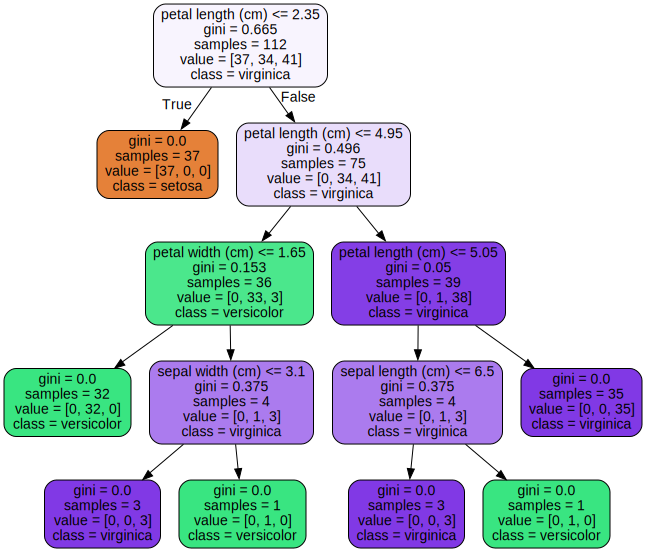

In [13]:
graphviz.Source(dot_data)

### Breast Cancer Dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset.data, cancer_dataset.target, random_state=42)

In [15]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
tree.score(X_train, y_train)

1.0

In [17]:
tree.score(X_test, y_test)

0.9300699300699301

In [18]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [19]:
tree.score(X_train, y_train)

0.9953051643192489

In [20]:
tree.score(X_test, y_test)

0.951048951048951

In [21]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.73943775, 0.        , 0.        ,
       0.013032  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01737208, 0.00684355, 0.        ,
       0.06019401, 0.11783988, 0.        , 0.03522339, 0.01005736,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer_dataset.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer_dataset.feature_names)
    
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

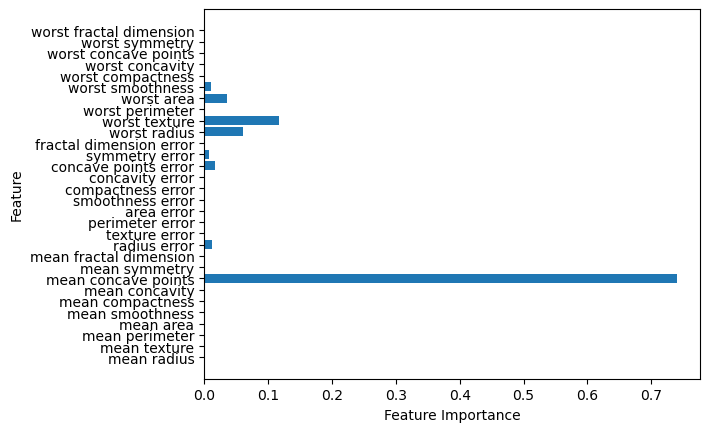

In [25]:
plot_feature_importances_cancer(tree)

In [26]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)

In [27]:
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
forest.score(X_train, y_train)

1.0

In [30]:
forest.score(X_test, y_test)

0.972027972027972

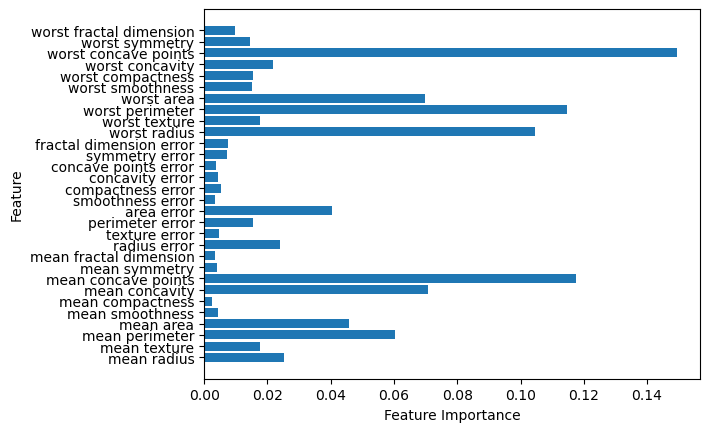

In [31]:
plot_feature_importances_cancer(forest)